# Training Models

## Linear Regression

**Equation of Linear Regression model prediction**

$ \hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n} $

- y is the predicted value.
- n is the number of features
- $x_{i}$ is the $i^{th}$ feature value
- $\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_{0}$ and the feature weights $\theta_{1},\theta_{2},...,\theta_{n}$)

This can be written much more concisely using a **vectorized form**:

$\hat{y} = h_{\theta}(x) = \theta · x$ 

- $\theta$ is the model's parameter vector, containing the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ to $\theta_{n}$.
- x is the instance's feature vector, containing $x_{0}$ to $x_{n}$, with $x_{0}$ always equal to 1.
- $\theta . x$ is the dot product of the vectors $\theta$ and $x$, which is of course equal to $\theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$.
- $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$.

To train a Linear Reegression model, we need to find the value of $\theta$ that minimizes the RMSE. In practice, it is simpler to minimize the mean square error (MSE) than the RMSE, and it leads to the same result.

**Equation of MSE cost function for a Linear Regression model**:

$MSE(X,h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\theta^{T}x^{(i)} - y^{(i)})^{2}$

## The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a mathematical equation that gives the result directly called the **Normal Equation**:

$\hat{\theta} = (X^{(T)}X)^{-1} X^{T}  y$

In this equation:

- $\theta$ is the value of $\theta$ that minimizes the cost function.
- y is the vector of target values containing $y^{1}$ to $y^{m}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

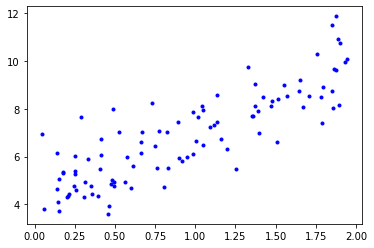

In [2]:
plt.plot(X, y, "b.")
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)), X] # add Xtheta = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.28559366],
       [2.74254591]])

The function used to generate the data was $y = 4 + 3x_{1} +$ Gaussian noise. In our random set the values that came from theta_best are better because they adapt better in the data with the noise. Now we can make predictions with theta_best:

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.28559366],
       [9.77068549]])

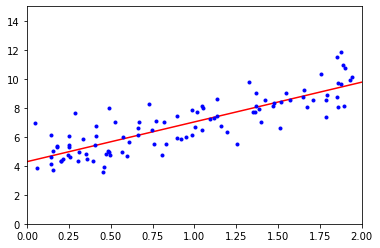

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.59886689]), array([[0.92242629]]))

In [7]:
lin_reg.predict(X_new)

array([[4.28559366],
       [9.77068549]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond =1e-6,)
theta_best_svd

array([[4.28559366],
       [2.74254591]])

The function computes $\hat{\theta} = X^{+}y$, where $X^{+}$ is the pseudoinverse of X(specifically, the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly. 

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that descompose the training set matrix into the matrix multiplication of three matrices $U \sum V^{T}$. The approach is more efficient than computing the Normal Equation, plus it handles edge cases.

## Gradient Descent

*Gradient Descent* is generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

You start by filling $\theta$ with random values(this is called *random initialization*). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function(e.g.m the MSE), until the algorithm *converges* to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by the *learning rate* hyperparameter. If it is too small, there is going to be needed a lot of iterations. On the other hand, if it is too high it is possible to not have a convergence.

If the random initialization starts the algorithm on the left, then it will converge to a *local minimum*, which is not as good as the *global minimum*.

When using Gradient Descent, you should ensure that all features have a similar scale(Scikit-Learn's StandardScaler class), or else it will take much longer to converge.

### Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regard to each model parameter $\theta_{j}$. You need to calculate how much the cost functiom is going to change $\theta_{j}$, this is called *partial derivative*.

**Equation Partial derivative of the cost function**

$\frac{\partial}{\partial \theta_{j}}$ MSE($\theta$)= $\frac{2}{m}\sum_{i=1}^{m} (\theta^{T}x^{(i)} - y^{(i)})x_{j}^{(i)}$

Instead of computing these partial derivative individually, you can use the next equation to compute them all in one go. The gradient vector contains all the partial derivatives of the cost function (one for each model parameter).

**Equation gradient vector of the cost function**

$\nabla_{\theta}$MSE($\theta$) = $\frac{2}{m}X^{T}(X\theta -y)$

The algortihm is called *Batch Gradient Descent*, because this formula involves calculations over the full training set **X**.As a result it is terribly slow on very large training sets.

In [9]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta*gradients
    
theta

array([[4.28559366],
       [2.74254591]])

To find a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

A simple to soltions to find the number of iterations is to set a very large number of iterations but not interrupt the algorithm when the gradient vector becomes tiny - that is, when its norm becomes smaller than a tiny number $\epsilon$(called the tolerance) - because this happen when Gradient Descent has (almost) reached the minimum. 

### Stochastic Gradient Descent 

The problem of using the Batch Gradient Descent is that it uses the whole training set. At the opposite site, *Stochastic Gradient Descent* picks a random instance in the training set at every step and computes the gradients based only on that single instance. It will be faster for the fact that is less data.

On the other hand, due its stochastic nature, this algortihm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

When the cost function is very irregular, Stochastic Gradient Descent has a better chance to find the global minimum than Batch Gradient Descent.

The function that determines the learning rate at each iteration is called *learning schedule*.

In [10]:
n_epochs = 50
t0, t1 = 5, 50  #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

theta

array([[4.35866545],
       [2.71242351]])

When using SGD, the training instances must be independent and identically distributed to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training, if you don't shuffle the instances then SGD will start by optimizing for one one label, then the next, and so on, and it will not settle close to the global minimum.

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())  #ravel returns a contigious flattened array(1D array)

sgd_reg.intercept_, sgd_reg.coef_

(array([4.31235779]), array([2.76399614]))

### Mini-batch Gradient Descent

At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-Batch GD computes the gradients on small random sets of instances called *mini-batches*. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

Mini-batch GD will end up walking around a bit closer to the minimum than Stochastic GD - but it may be harder for it to escape from local minima.

## Polynomial Regression

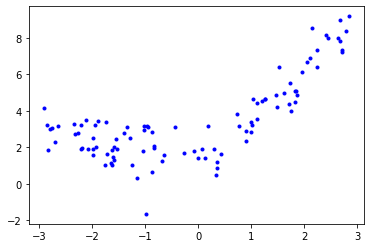

In [12]:
m = 100
X = 6* np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X, y, "b.")
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([0.06721562]), array([0.06721562, 0.00451794]))

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data.

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

y_pred = lin_reg.predict(X_poly)

lin_reg.intercept_, lin_reg.coef_

(array([2.0750237]), array([[0.94531553, 0.50692982]]))

The model estimates $\hat{y} = 0.49(x_{1})^2 + 1.09x_{1} + 2.08$.

And the function was $y = 0.5x_{1}^{2} + 1.0x_{1} + 2 +$ Gaussian Noise

## Learning Curves 

If a model perfoms well on the training data but generaizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way to tell is to look at the *learning curves*:these are plots of the model's performance on the training set and the validation set as a function of the training set size.

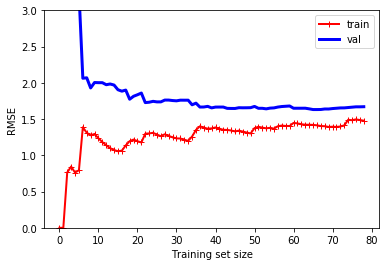

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.ylim(0,3)
    plt.legend()
    plt.show()
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

These learning curves are typical of a model that's underfitting. Both curves have reached a plateau: they are close and fairly high.

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

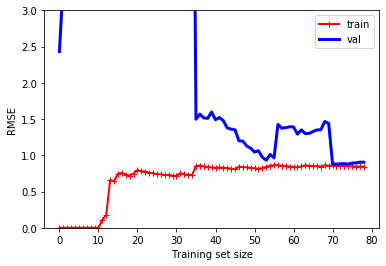

In [16]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

There is gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the halfmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

### The Bias/Variance Trade-off

*Bias*: This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

*Variance*: This part is due to the model's excessive sensivity to small variations in the training data. A model with many degrees of freedom (such as high-degree polynomial model) is likely to have high variance and thus overfit the training data.

*Irreducible error*: This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outilers).

Increasing a model's complexity will tipically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called a trade-off.

## Regularized Linear Model

The fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

### Ridge Regression

*Ridge Regression* (also called *Tikhonov regularization*) is a regularized version of Linear Regression: a *regulariation term* is added to the cost function. 
This forces the leraning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model's performance.

**Equation of Ridge Regression cost function**

$J(\theta) = $MSE($\theta$) + $\alpha\frac{1}{2}\sum_{i=1}^{n}(\theta_{i})^{2}$

The hyperparameter $\alpha$ controls how much you want to regularize the model, if $\alpha = 0$ the Ridge Regeression is just Linear Regression.

As with a Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent.

**Equation od Ridge Regression closed-form solution**

$\hat{\theta} = (X^{T}X + \alpha A)^{-1}   X^{T}  y$

$A$ is the (n+1)x(n+1) *identity matrix*, except with a 0 in the top cell, corresponding to the bias term.

In [17]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky") #uses a matrix factorization technique by André-Louis Cholesky
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.97745437]])

In [18]:
sgd_reg = SGDRegressor(penalty="l2") # indicates to add a regularization term to cost function
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.95659253])

### Lasso Regression

*Least Absolute Shrinkage and Selection Operator Reegression* (usually called *Lasso Regression*) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the *$l_{1}$* norm of the weight vector instead of half the square of the *$l_{2}$* norm

**Equation Lasso Regression cost function**

$J(\theta) = $MSE$(\theta) + \alpha\sum_{i=1}^{n}\lvert \theta_{i} \rvert$

To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need gradually reduce the learning rate during training (it will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge).

In [19]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.92755506])

Since Lasso Regression can exclude useless variables from equations, it is a bit better than Ridge Regression at reducing the Variance in models that contains a lot od useless variables. In contrast Ridge Regression tends to do a little better when most variables are useful.

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix both Ridge and Lasso's regularization terms, and you can control the mix ratio *r*. When *r* = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

**Equation Elastic Net cost function**

J($\theta$) = MSE$(\theta) = r\alpha\sum_{i=1}^{n} \lvert \theta_{i} \rvert + \frac{1-r}{2}\alpha\sum_{i=1}^{n} (\theta_{i})^{2}$

When you should use plain Linear Regression Ridge, Lasso or Elastic Net ? Ridge is a good default, but if you suspect that only a few features are useful you should prefer Lasso or Elastic Net because they tend to reduce the useless features weights down to zero. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated..

In [20]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.93055469])

### Early Stopping

A very different way to regularize iterative leraning algorithm such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*.

With Stochastic and Mini-batch GD, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time, then roll back the model parameters to the point where the validation error was at minimum.

In [36]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

#prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant",
                      eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None


for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg) #mistake in the book

## Logistic Regression

*Logistic Regression* is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class, and otherwise it predicts that it does not. This makes it a binary classifier.

### Estimating Probabilities

**Equation Logistic Regression estimated probability (vectorized form)**

$\hat{p} = h_{\theta}(x) = \sigma(x^{T}\theta)$

The logistic is a sigmoid function that outputs a number between 0 and 1.

**Equation Logistic Function**

$\sigma(t) = \frac{1}{1 + exp(-t)}$

### Training and Cost Function

**Equation Logistic Regression cost function (log loss)**

$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} [y^{(i)}\log{(\hat{p}^{(i)})} + (1 - y^{(i)})\log{(1 - \hat{p}^{(i)})}]$

The bad news is that there is no known closed-form equation to compute the value pf $\theta$ that minimizes this cost function. The good news is that this cost function is converx, so Gradient Descendent is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).

**Equation Logistic cost function partial derivative**

$\frac{\partial}{\partial\theta_{j}}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^{T}x^{(i)}) - y^{(i)})x_{j}^{(i)}$

### Decision Boundaries

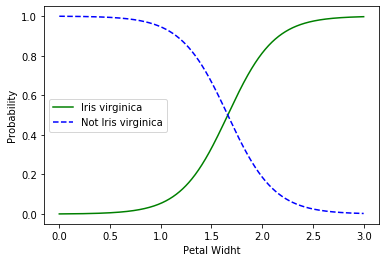

In [41]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris["data"][:,3:] #petal width
y = (iris["target"] == 2).astype(np.int) # If Iris virginica, else 0

log_reg = LogisticRegression()
log_reg.fit(X, y)

#Let's look at the model's estimated probabilites for flowers with petal widths varying from 0 to 3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend(loc="center left")
plt.xlabel("Petal Widht")
plt.ylabel("Probability")
plt.show()

### Softmax Regression

*Softmax Regression* or *Multinomial Logistic Regression* is when the Logisitic Regression model generalize multiple classes directly without having to train and combine multiple binary classifiers.

The idea is simple: when given an instance **x**, the Softmax Regression model first computes a score $s_{k}(x)$ for each class k, then estimates the probability of each class by applying the *softmax function* to the socres.

**Equation Softmax score for class k**

$s_{k}(x) = x^{T}\theta^{(k)}$

Once you have computed the socre of every class for the instance **x**, you can estimate the probability $\hat{p}_{k}$ that the instance belongs to class k by running the scores through the softmax function.

**Equation Softmax function**

$\hat{p}_{k} = \sigma(s(x))_{k} = \frac{\exp(s_{k}(x))}{\sum_{j=1}^{K}\exp(s_{j}(x))}$

- K is the number of classes.
- s(x) is a vector containing scores of each class for the instance **x**.
- $\sigma(s(x))_{k}$ is the estimated probability that the instance **x** belongs to class *k*, given the scores of each class for that instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability.

**Equation Cross entropy cost function**

$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K} y_{k}^{(i)}\log{(\hat{p}_{k}^{(i)})}$

- $y_{k}^{(i)}$ is the target that the $i^{th}$ instance belongs to class *k*. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.

In [42]:
X = iris["data"][:, (2, 3)] #petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10) #Solver that supports Softmax Regression
softmax_reg.fit(X, y)
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
